In [1]:
print("In this exercise I will be using lending data collected between 2007-2010 from Lending.com to classify and predict whether  or not a borrow utilizing the website paid back their loan in-full to the investor.")

In this exercise I will be using lending data collected between 2007-2010 from Lending.com to classify and predict whether  or not a borrow utilizing the website paid back their loan in-full to the investor.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
loans = pd.read_csv(r'C:\Users\camwa\OneDrive\Datasets\loan_data.csv')

In [4]:
loans.head()
#Column representations:
#credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
#purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
#int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
#installment: The monthly installments owed by the borrower if the loan is funded.
#log.annual.inc: The natural log of the self-reported annual income of the borrower.
#dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
#fico: The FICO credit score of the borrower.
#days.with.cr.line: The number of days the borrower has had a credit line.
#revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
#revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
#inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
#delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
#pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

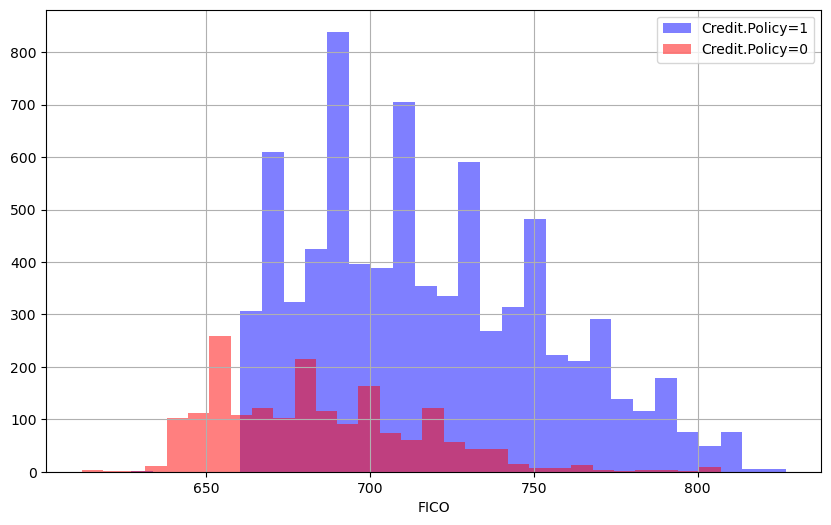

In [5]:
#Exploratory Data Analysis 
#Creating histograms of the two FICO distributions for each credit.policy outcome
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

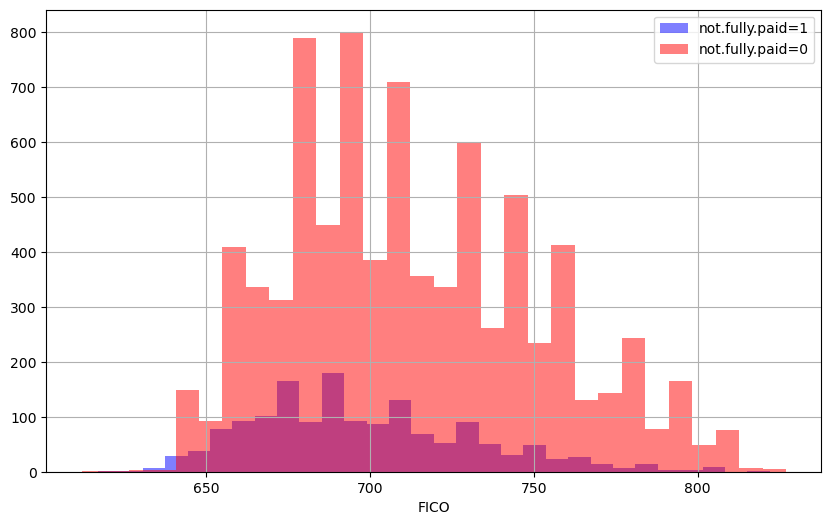

In [6]:
#Creating histograms of the two FICO distributions depending on whether or not the borrow fully paid back their loan
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

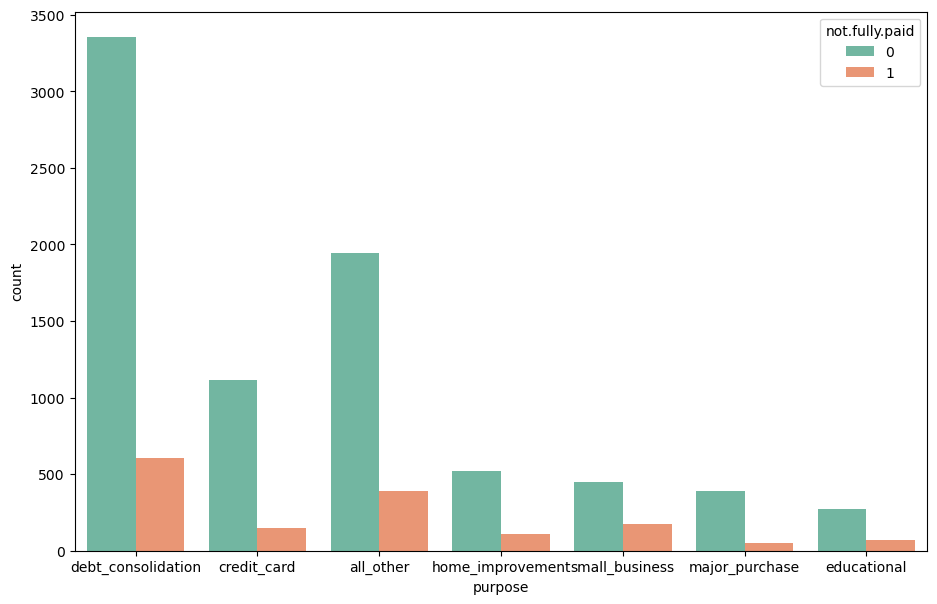

In [7]:
#Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set2')

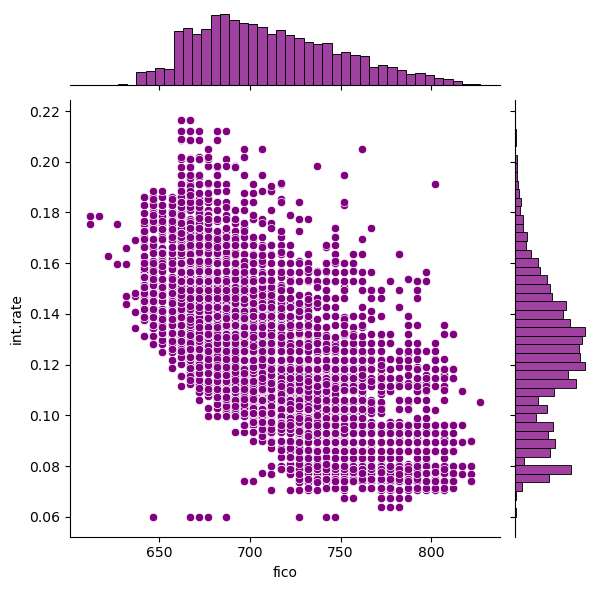

In [8]:
#Creating a jointplot to see the trend between FICO score and interest rate.
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

C:\Users\camwa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


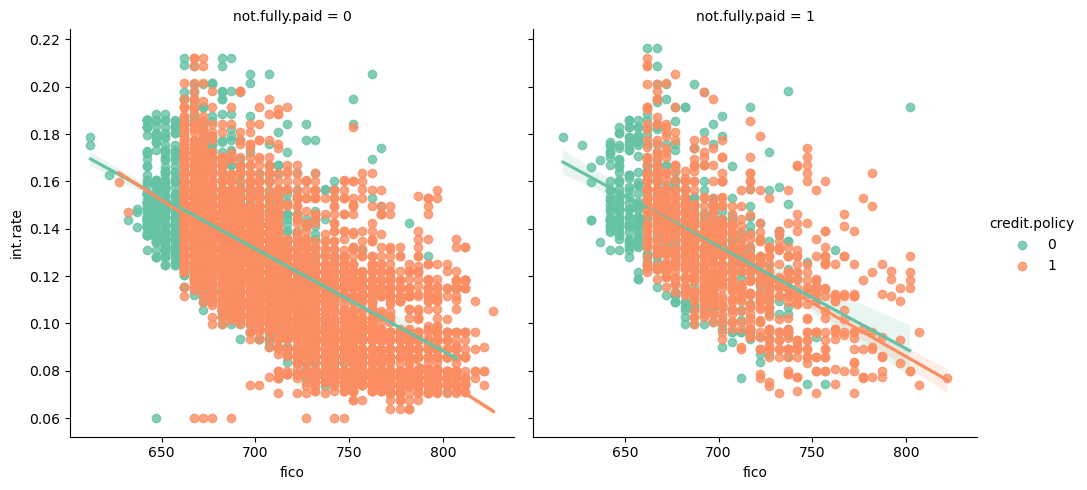

In [9]:
#Creating lmplots to see if the above trend differed between not.fully.paid and credit.policy.
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set2')

In [10]:
#Now it's time to set up the data for a Random Forest Classification Model
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
#Because the "purpose" variable is categorical, I need to transform this column using dummy variables
cat_features = ['purpose']
df = pd.get_dummies(loans, columns = cat_features, drop_first = True)

In [12]:
#Now it is time to split the data into a training set and a testing set
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
#Training a single decision tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier() #creating a decision tree classifier
dtree.fit(X_train,y_train) #fitting the training data to the classifier

DecisionTreeClassifier()

In [16]:
#Creating predictions from the test data
predictions = dtree.predict(X_test)

In [17]:
#Evaluating the model with a classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [19]:
print(confusion_matrix(y_test,predictions))

[[1995  436]
 [ 341  102]]


In [20]:
#It's time to train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [22]:
#Time to predict off of the y test values and evaluate the model
predictions = rfc.predict(X_test) #Get the model predictions

In [23]:
#Evaluating the model with a classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [25]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 435    8]]


In [31]:
print(f'Though the random forest model performed better than the single decision tree, neither did as well as I would want. \nMore feature engineering is necessary.')

Though the random forest model performed better than the single decision tree, neither did as well as I would want. 
More feature engineering is necessary.
